In [1]:
import torch

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from VanillaTransformer import VanillaTransformer, CustomDataSet, model_tuning
from config import SAMPLE_SIZE_BY_SEQ_LENGTH, MAX_SEQ_LENGTH, VOCAB_SIZE, RANDOM_STATE
from model_utils import print_accuracy

### Data Setup

In [2]:
sample_size_by_seq_length = SAMPLE_SIZE_BY_SEQ_LENGTH
max_seq_length = MAX_SEQ_LENGTH     # also a parameter for the transformer model
vocab_size = VOCAB_SIZE             # also a parameter for the transformer model
random_state = RANDOM_STATE

dataset = CustomDataSet(
    sample_size_by_seq_length,
    max_seq_length,
    vocab_size,
    random_state
)

# Split dataset into 20% training, 10% validation and 70% test
train_data, test_data = train_test_split(dataset, test_size=0.8, random_state=random_state)

val_data, test_data = train_test_split(test_data, test_size=0.875, random_state=random_state)

batch_size = 8
train_data_loader = DataLoader(train_data, batch_size, shuffle=True)

input_val = torch.stack([row[0] for row in val_data])
target_val = torch.stack([row[1] for row in val_data])

input_test = torch.stack([row[0] for row in test_data])
target_test = torch.stack([row[1] for row in test_data])

In [3]:
# Train dataset size
len(train_data)

998

In [4]:
# Train dataset example
train_data[:6]

[(tensor([5, 6, 1, 0, 0]), tensor([10,  1,  6,  5,  0,  0])),
 (tensor([8, 8, 3, 4, 9]), tensor([10,  9,  4,  3,  8,  8])),
 (tensor([5, 9, 4, 1, 1]), tensor([10,  1,  1,  4,  9,  5])),
 (tensor([4, 2, 2, 8, 0]), tensor([10,  8,  2,  2,  4,  0])),
 (tensor([4, 5, 4, 5, 9]), tensor([10,  9,  5,  4,  5,  4])),
 (tensor([9, 7, 2, 8, 5]), tensor([10,  5,  8,  2,  7,  9]))]

In [5]:
# Validation dataset size
len(val_data)

499

In [6]:
# Validation dataset example
val_data[:6]

[(tensor([4, 4, 5, 1, 1]), tensor([10,  1,  1,  5,  4,  4])),
 (tensor([6, 8, 5, 8, 2]), tensor([10,  2,  8,  5,  8,  6])),
 (tensor([1, 2, 9, 1, 5]), tensor([10,  5,  1,  9,  2,  1])),
 (tensor([5, 3, 2, 9, 4]), tensor([10,  4,  9,  2,  3,  5])),
 (tensor([8, 9, 9, 3, 9]), tensor([10,  9,  3,  9,  9,  8])),
 (tensor([1, 1, 3, 4, 1]), tensor([10,  1,  4,  3,  1,  1]))]

In [7]:
# Test dataset size
len(test_data)

3495

In [8]:
# Test dataset example
test_data[:6]

[(tensor([6, 6, 1, 5, 3]), tensor([10,  3,  5,  1,  6,  6])),
 (tensor([7, 4, 8, 5, 8]), tensor([10,  8,  5,  8,  4,  7])),
 (tensor([4, 6, 6, 5, 5]), tensor([10,  5,  5,  6,  6,  4])),
 (tensor([9, 2, 3, 1, 0]), tensor([10,  1,  3,  2,  9,  0])),
 (tensor([8, 8, 4, 3, 0]), tensor([10,  3,  4,  8,  8,  0])),
 (tensor([5, 1, 3, 8, 1]), tensor([10,  1,  8,  3,  1,  5]))]

### Transformer Architecture

![Vanilla Transformer.png](<attachment:Vanilla Transformer.png>)
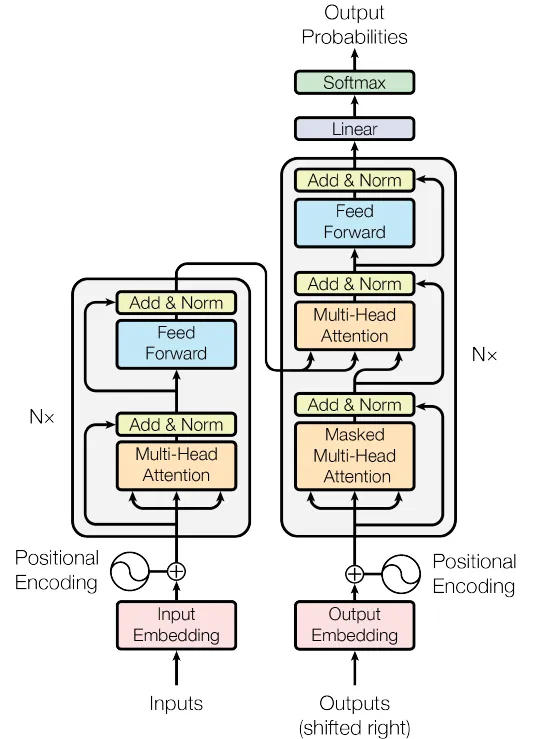

### Model Setup

In [9]:
src_vocab_size = vocab_size + 1  # adding padding token 0
tgt_vocab_size = vocab_size + 2  # adding padding token 0 and start of sequence token (which is 10 in this case)
embed_dim = 512
max_seq_length = max_seq_length
n_heads = 8
n_layers = 1
d_ff = 2048
dropout_rate = 0.1

model = VanillaTransformer(
    src_vocab_size=src_vocab_size,
    tgt_vocab_size=tgt_vocab_size,
    embed_dim=embed_dim,
    max_seq_length=max_seq_length,
    n_heads=n_heads,
    n_layers=n_layers,
    d_ff=d_ff,
    dropout_rate=dropout_rate,
)

### Model Training

We train the model on train dataset and use cross entropy loss as objective function.

In [10]:
train_loss = model.model_training(train_data_loader, epochs=20, lr=1e-5, print_loss=True)

Epoch: 1, Loss: 1.8096758127212524
Epoch: 2, Loss: 1.411741018295288
Epoch: 3, Loss: 0.7652240991592407
Epoch: 4, Loss: 0.8128155469894409
Epoch: 5, Loss: 0.5295798182487488
Epoch: 6, Loss: 0.5216532349586487
Epoch: 7, Loss: 0.21543781459331512
Epoch: 8, Loss: 0.2492685616016388
Epoch: 9, Loss: 0.2534533441066742
Epoch: 10, Loss: 0.2330797016620636
Epoch: 11, Loss: 0.2787517309188843
Epoch: 12, Loss: 0.09256324917078018
Epoch: 13, Loss: 0.2796880900859833
Epoch: 14, Loss: 0.10518288612365723
Epoch: 15, Loss: 0.10468956083059311
Epoch: 16, Loss: 0.08435027301311493
Epoch: 17, Loss: 0.06962082535028458
Epoch: 18, Loss: 0.10666897892951965
Epoch: 19, Loss: 0.03471643105149269
Epoch: 20, Loss: 0.14675766229629517


### Model Evaluation

We run the model on test dataset, and report the cross entropy loss.<br>
Besides, we also report prediction accuracy on token and sequence level.

In [11]:
out_test, loss = model.model_eval(input_test, target_test)
print("Test loss:", loss)

Test loss: 0.23524387180805206


In [12]:
# Target sequences
target_test[:, 1:]

tensor([[3, 5, 1, 6, 6],
        [8, 5, 8, 4, 7],
        [5, 5, 6, 6, 4],
        ...,
        [5, 8, 3, 9, 0],
        [2, 1, 8, 9, 4],
        [1, 4, 6, 5, 4]])

In [13]:
# Predicted sequences
pred_test = torch.argmax(out_test, dim=-1)
pred_test

tensor([[3, 5, 1, 6, 6],
        [8, 5, 8, 4, 7],
        [5, 5, 6, 4, 6],
        ...,
        [5, 8, 3, 9, 0],
        [2, 1, 8, 9, 4],
        [1, 4, 6, 5, 4]], device='cuda:0')

In [14]:
print_accuracy(pred_test, target_test[:, 1:])

Report accuracy on token level
Number of wrong token predictions: 1072
Number of total token predictions: 17475
Token Accuracy: 93.8655%

Report accuracy on sequence level
Number of wrong sequence predictions: 580
Number of total sequence predictions: 3495
Sequence Accuracy: 83.4049%


### Model Tuning

We use optuna and a validation dataset to tune the model for the following parameters (numbers in brackets are possible values):
- embed_dim: [256, 512, 1024, 2048]
- n_heads: [1, 2, 4, 8]
- n_layers: [1, 2, 4]
- d_ff = [512, 1024, 2048, 4096]
- dropout_rate: [0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [15]:
best_params = model_tuning(
    train_data_loader,
    input_val,
    target_val,
    vocab_size,
    max_seq_length,
    epochs=10,
    n_trials=30,
)
print("Best params: ", best_params)

[I 2024-01-30 14:15:15,943] A new study created in memory with name: no-name-33b67b67-7668-45da-a972-93d6b1691e9e
[I 2024-01-30 14:16:16,033] Trial 0 finished with value: 0.00769601808860898 and parameters: {'embed_dim': 512, 'n_heads': 8, 'n_layers': 4, 'd_ff': 4096, 'dropout_rate': 0}. Best is trial 0 with value: 0.00769601808860898.
[I 2024-01-30 14:16:55,595] Trial 1 finished with value: 0.5076445937156677 and parameters: {'embed_dim': 2048, 'n_heads': 2, 'n_layers': 1, 'd_ff': 2048, 'dropout_rate': 0.3}. Best is trial 0 with value: 0.00769601808860898.
[I 2024-01-30 14:17:39,273] Trial 2 finished with value: 0.051112718880176544 and parameters: {'embed_dim': 256, 'n_heads': 1, 'n_layers': 4, 'd_ff': 1024, 'dropout_rate': 0.1}. Best is trial 0 with value: 0.00769601808860898.
[I 2024-01-30 14:18:06,390] Trial 3 finished with value: 0.3929946720600128 and parameters: {'embed_dim': 512, 'n_heads': 4, 'n_layers': 2, 'd_ff': 512, 'dropout_rate': 0.5}. Best is trial 0 with value: 0.0076

Best params:  {'embed_dim': 1024, 'n_heads': 8, 'n_layers': 4, 'd_ff': 4096, 'dropout_rate': 0}


#### Model Setup with tuned parameters

In [16]:
model = VanillaTransformer(
    src_vocab_size=src_vocab_size,
    tgt_vocab_size=tgt_vocab_size,
    embed_dim=best_params["embed_dim"],
    max_seq_length=max_seq_length,
    n_heads=best_params["n_heads"],
    n_layers=best_params["n_layers"],
    d_ff=best_params["d_ff"],
    dropout_rate=best_params["dropout_rate"],
)

#### Model Training with tuned parameters

In [17]:
train_loss = model.model_training(train_data_loader, epochs=20, lr=1e-5, print_loss=True)

Epoch: 1, Loss: 0.6881987452507019
Epoch: 2, Loss: 0.09694904834032059
Epoch: 3, Loss: 0.025846531614661217
Epoch: 4, Loss: 0.06201569363474846
Epoch: 5, Loss: 0.011647971346974373
Epoch: 6, Loss: 0.010680916719138622
Epoch: 7, Loss: 0.00915051344782114
Epoch: 8, Loss: 0.029451774433255196
Epoch: 9, Loss: 0.009591045789420605
Epoch: 10, Loss: 0.006056835874915123
Epoch: 11, Loss: 0.0006256059277802706
Epoch: 12, Loss: 0.00033966120099648833
Epoch: 13, Loss: 0.00023254378174897283
Epoch: 14, Loss: 0.0003041864256374538
Epoch: 15, Loss: 0.00015704116958659142
Epoch: 16, Loss: 0.00020535135990940034
Epoch: 17, Loss: 0.0003366702585481107
Epoch: 18, Loss: 0.00014765045489184558
Epoch: 19, Loss: 0.00036267575342208147
Epoch: 20, Loss: 0.00020857652998529375


#### Model Evaluation with tuned parameters

In [18]:
out_test, loss = model.model_eval(input_test, target_test)
print("Test loss:", loss)

Test loss: 0.0010492849396541715


In [19]:
# Target sequences
target_test[:, 1:]

tensor([[3, 5, 1, 6, 6],
        [8, 5, 8, 4, 7],
        [5, 5, 6, 6, 4],
        ...,
        [5, 8, 3, 9, 0],
        [2, 1, 8, 9, 4],
        [1, 4, 6, 5, 4]])

In [20]:
# Predicted sequences
pred_test = torch.argmax(out_test, dim=-1)
pred_test

tensor([[3, 5, 1, 6, 6],
        [8, 5, 8, 4, 7],
        [5, 5, 6, 6, 4],
        ...,
        [5, 8, 3, 9, 0],
        [2, 1, 8, 9, 4],
        [1, 4, 6, 5, 4]], device='cuda:0')

In [21]:
print_accuracy(pred_test, target_test[:, 1:])

Report accuracy on token level
Number of wrong token predictions: 2
Number of total token predictions: 17475
Token Accuracy: 99.9886%

Report accuracy on sequence level
Number of wrong sequence predictions: 2
Number of total sequence predictions: 3495
Sequence Accuracy: 99.9428%


### Acknowledgement
We referenced the implementation of the vanilla transformer from [datacamp](https://www.datacamp.com/tutorial/building-a-transformer-with-py-torch).